<a href="https://colab.research.google.com/github/itsshavar/machine_learning/blob/master/KMeans_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# K-means

## Description:
Given a set of observations (x1, x2, ..., xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, ..., Sk} so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:
  ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/8dc15ec63e0676fc07e790f61efd89484a6b7922)
  
where μi is the mean of points in Si. This is equivalent to minimizing the pairwise squared deviations of points in the same cluster:
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/9fb2388a00fcf4f1df3117883fccd0c4028da33d)


The equivalence can be deduced from identity $ \sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}=\sum _{\mathbf {x} \neq \mathbf {y} \in S_{i}}(\mathbf {x} -{\boldsymbol {\mu }}_{i})({\boldsymbol {\mu }}_{i}-\mathbf {y} )$
. Because the total variance is constant, this is equivalent to maximizing the sum of squared deviations between points in different clusters (between-cluster sum of squares, BCSS),which follows from the law of total variance. 


## Algorithm

In the clustering problem, we are given a training set {$x^{(1)}, ... , x^{(m)}$}, and want to group the data into a few cohesive "clusters." Here, we are given feature vectors for each data point $x^{(i)} \in \mathbb{R}^n$ as usual; but no labels $y^{(i)}$ (making this an unsupervised learning problem). Our goal is to predict $k$ centroids and a label $c^{(i)}$ for each datapoint. The k-means clustering algorithm is as follows:

 ![KMeans Algorithm](https://stanford.edu/~cpiech/cs221/img/kmeansMath.png)



## Datset Creation

In [0]:
# Library imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [0]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

## Algoritm Implementation

### Centroid Initialization

In [0]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points
    >>>initialize_centroids(points, 3)
    array([[ 2.89419825,  0.86367801],
       [ 0.7415093 , -1.21644056],
       [ 1.47268922, -1.19183556]])"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

### Closest Centroid

In [0]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point
    >>>closest_centroid(points, initialize_centroids(points, 3))
    array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1], dtype=int64)
    """
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

### Move Centroids

In [0]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them
    >>> move_centroids(points, closest_centroid(points, initialize_centroids(points, 3)),initialize_centroids(points, 3) )
    array([[-0.06971844,  0.66614582],
       [ 0.85831935, -0.18948577],
       [-0.82669027,  0.23483006]])
    
    """
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

### Repeat Till Convergence


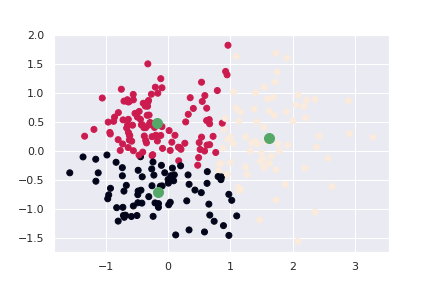
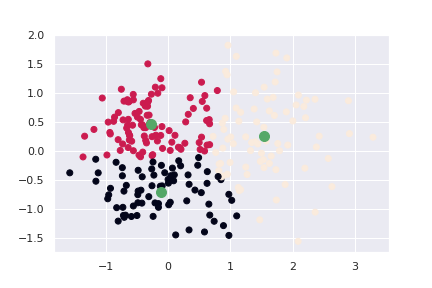
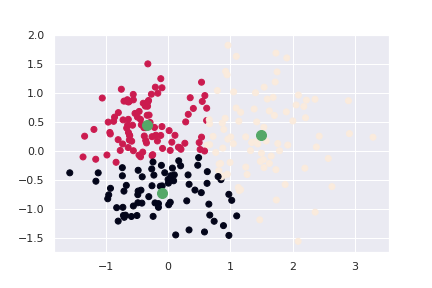
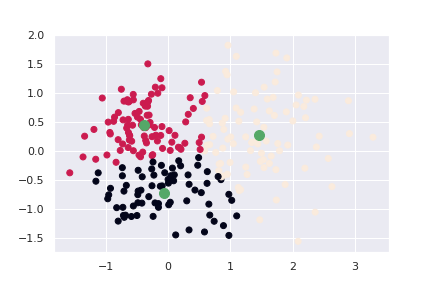
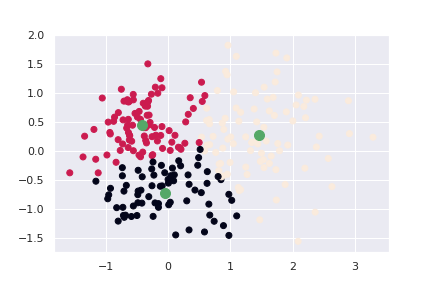
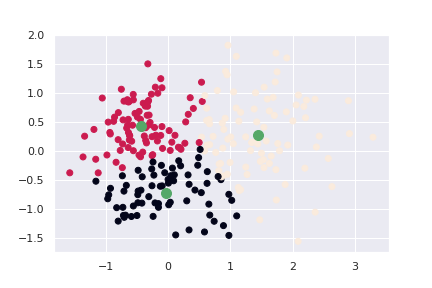
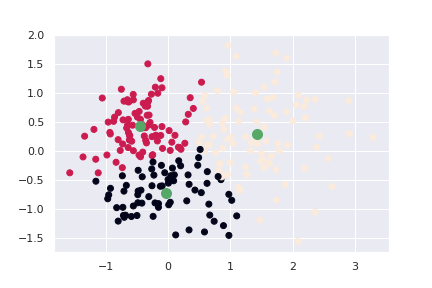
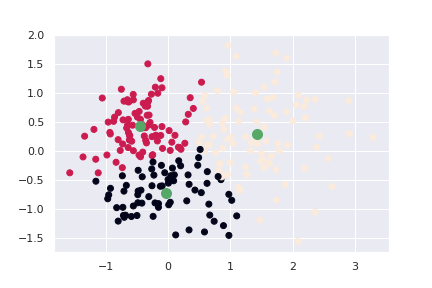
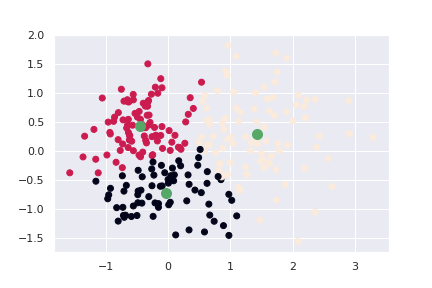
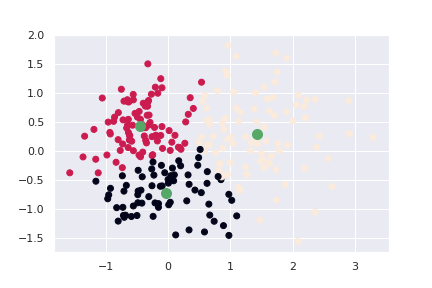

In [24]:
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation

centroids = initialize_centroids(points, 3)
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

def init():
  return  fig,

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='g', s=100)
    return fig,
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=10, interval=200, blit=True)